<a href="https://colab.research.google.com/github/danunter/hw/blob/main/hw4_preprocessing_and_cnn_NN_drone_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

write a code that go to the folder "/content/drive/MyDrive/AI_course/hw4/drone_data", this folder contain images and txt files in YOLOv8 format. the code needs to take the image and crop it according to the boundaries in the corresponding txt file that caries the same name as the image. save the new images in a folder "/content/drive/MyDrive/AI_course/hw4/drone_new_data"

In [ ]:
import os
from PIL import Image

# Set the paths
input_folder = "/content/drive/MyDrive/AI_course/hw4/drone_data"
output_folder = "/content/drive/MyDrive/AI_course/hw4/drone_new_data"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Get a list of all files in the input folder
files = os.listdir(input_folder)

# Iterate through each file in the input folder
for file in files:
    # Check if the file is an image (assuming it's a jpg, you can modify accordingly)
    if file.endswith(".jpg"):
        # Construct the paths for the image and its corresponding txt file
        image_path = os.path.join(input_folder, file)
        txt_path = os.path.join(input_folder, file.replace(".jpg", ".txt"))

        # Check if the corresponding txt file exists
        if os.path.exists(txt_path):
            # Open the txt file and get the bounding box coordinates
            with open(txt_path, 'r') as txt_file:
                lines = txt_file.readlines()
                # Assuming the YOLOv8 format has four values: class, x_center, y_center, width, height
                # You may need to adjust this based on the actual format of your txt files
                x_center, y_center, width, height = map(float, lines[0].split()[1:])

            # Open the image
            image = Image.open(image_path)

            # Calculate the coordinates for cropping
            left = int((x_center - width / 2) * image.width)
            top = int((y_center - height / 2) * image.height)
            right = int((x_center + width / 2) * image.width)
            bottom = int((y_center + height / 2) * image.height)

            # Crop the image
            cropped_image = image.crop((left, top, right, bottom))

            # Save the cropped image to the output folder
            output_path = os.path.join(output_folder, file)
            cropped_image.save(output_path)

            print(f"Processed: {file}")
        else:
            print(f"Corresponding txt file not found for: {file}")


now write a code that does go to  the folder "/content/drive/MyDrive/AI_course/hw4/drone_data",  take the image and crop it in a random position, according to the size of the boundaries in the corresponding txt file that caries the same name as the image. save the new images in a folder "/content/drive/MyDrive/AI_course/hw4/no_drone"

In [ ]:
import os
import random
from PIL import Image

# Set the paths
input_folder = "/content/drive/MyDrive/AI_course/hw4/drone_data"
output_folder = "/content/drive/MyDrive/AI_course/hw4/no_drone"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Get a list of all files in the input folder
files = os.listdir(input_folder)

# Iterate through each file in the input folder
for file in files:
    # Check if the file is an image (assuming it's a jpg, you can modify accordingly)
    if file.endswith(".jpg"):
        # Construct the paths for the image and its corresponding txt file
        image_path = os.path.join(input_folder, file)
        txt_path = os.path.join(input_folder, file.replace(".jpg", ".txt"))

        # Check if the corresponding txt file exists
        if os.path.exists(txt_path):
            # Open the txt file and get the bounding box coordinates
            with open(txt_path, 'r') as txt_file:
                lines = txt_file.readlines()
                # Assuming the YOLOv8 format has four values: class, x_center, y_center, width, height
                # You may need to adjust this based on the actual format of your txt files
                x_center, y_center, width, height = map(float, lines[0].split()[1:])

            # Open the image
            image = Image.open(image_path)

            # Calculate the maximum allowed random cropping position
            max_left = int((1 - width) * image.width)
            max_top = int((1 - height) * image.height)

            # Randomly choose the cropping position
            left = random.randint(0, max_left)
            top = random.randint(0, max_top)
            right = left + int(width * image.width)
            bottom = top + int(height * image.height)

            # Crop the image
            cropped_image = image.crop((left, top, right, bottom))

            # Save the cropped image to the output folder
            output_path = os.path.join(output_folder, file)
            cropped_image.save(output_path)

            print(f"Processed: {file}")
        else:
            print(f"Corresponding txt file not found for: {file}")


greyscale and resize to 28X28

In [1]:
import os
from PIL import Image

# Set the path
input_folder = "/content/drive/MyDrive/AI_course/hw4/no_drone"
#input_folder = "/content/drive/MyDrive/AI_course/hw4/drone"

# Get a list of all files in the input folder
files = os.listdir(input_folder)

# Iterate through each file in the input folder
for file in files:
    # Check if the file is an image (assuming it's a jpg, you can modify accordingly)
    if file.endswith(".jpg"):
        # Construct the path for the image
        image_path = os.path.join(input_folder, file)

        # Open the image
        original_image = Image.open(image_path)

        # Convert the image to grayscale
        grayscale_image = original_image.convert('L')

        # Resize the image to 28x28
        resized_image = grayscale_image.resize((28, 28))

        # Replace the original image with the resized grayscale image
        resized_image.save(image_path)

        print(f"Processed: {file}")


Processed: video18_1295.jpg
Processed: Dji_pantom_Sunny (833).jpg
Processed: DJI_FPV_Cloudy (68).jpg
Processed: video17_946.jpg
Processed: video14_74.jpg
Processed: video18_1085.jpg
Processed: Dji_pantom_Sunny (1004).jpg
Processed: Dji_pantom_Sunny (765).jpg
Processed: DJI_FPV_Cloudy (1120).jpg
Processed: video18_2945.jpg
Processed: MAVIC_Air_Cloudy (501).jpg
Processed: MAVIC_Air_Evening (416).jpg
Processed: MAVIC_Air_Cloudy (1197).jpg
Processed: video18_1702.jpg
Processed: DJI_FPV_Sunny (83).jpg
Processed: video18_2166.jpg
Processed: name10.jpg
Processed: DJI_FPV_Sunny (1032).jpg
Processed: MAVIC_Air_Cloudy (1070).jpg
Processed: video16_201.jpg
Processed: video16_386.jpg
Processed: DJI_FPV_Evening (862).jpg
Processed: Dji_pantom_Sunny (74).jpg
Processed: 145.jpg
Processed: Dji_pantom_Sunny (453).jpg
Processed: DJI_FPV_Evening (416).jpg
Processed: video18_1722.jpg
Processed: video18_1492.jpg
Processed: DJI_FPV_Cloudy (80).jpg
Processed: video18_1604.jpg
Processed: DJI_FPV_Cloudy (764).


write a code that create dataset in tensorflow format, label "drone" all the images in the folder: "/content/drive/MyDrive/AI_course/hw4/drone". label "not a dron" all the images in the folder: "/content/drive/MyDrive/AI_course/hw4/no_drone".



In [13]:
import tensorflow as tf
import os

# Set the paths to the image folders
drone_folder = "/content/drive/MyDrive/AI_course/hw4/drone"
no_drone_folder = "/content/drive/MyDrive/AI_course/hw4/no_drone"

# Function to load and label images from a folder
def load_and_label_images(folder, label):
    image_files = [os.path.join(folder, file) for file in os.listdir(folder) if file.endswith(('.jpg', '.jpeg', '.png'))]
    labels = [label] * len(image_files)
    return image_files, labels

# Load and label images from the "drone" folder
drone_images, drone_labels = load_and_label_images(drone_folder, label=1)

# Load and label images from the "no_drone" folder
no_drone_images, no_drone_labels = load_and_label_images(no_drone_folder, label=0)

# Combine the data and labels
all_images = drone_images + no_drone_images
all_labels = drone_labels + no_drone_labels

# Create a TensorFlow dataset
dataset = tf.data.Dataset.from_tensor_slices((all_images, all_labels))

# Define a function to parse the images and resize them
def parse_image(file_path, label):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_image(image, channels=1)
    image = tf.image.resize_with_pad(image, target_height=28, target_width=28)
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values to the range [0, 1]
    return image, label

# Map the parse_image function to the dataset
dataset = dataset.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Shuffle and batch the dataset
dataset = dataset.shuffle(buffer_size=len(all_images))

# Display information about the dataset
print("Number of images:", len(all_images))
print("Number of classes:", len(set(all_labels)))

# Example: iterate through the first batch of the dataset
for images, labels in dataset.take(1):
    print("Batch shape:", images.shape)
    print("Labels:", labels)


Number of images: 6633
Number of classes: 2
Batch shape: (28, 28, 1)
Labels: tf.Tensor(0, shape=(), dtype=int32)


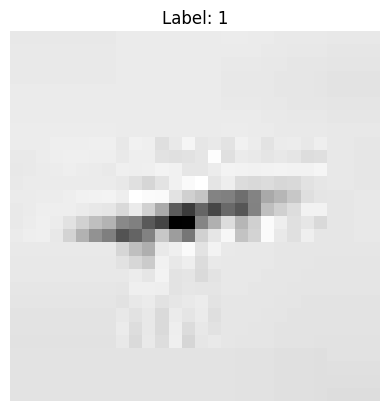

In [14]:
import matplotlib.pyplot as plt

# Set the default index (change as needed)
default_index = 1

# Retrieve an image and label from the dataset based on the index
selected_image, selected_label = list(dataset.skip(default_index - 1).take(1))[0]

# Display the image and its label
plt.imshow(selected_image.numpy().squeeze(), cmap='gray')
plt.title(f"Label: {selected_label.numpy()}")
plt.axis('off')
plt.show()



In [16]:
# Function to create and compile the CNN model
def create_model(input_shape=(28, 28, 1), num_classes=2):
    model = models.Sequential()

    model.add(layers.Conv2D(20, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(10, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten layer to prepare for fully connected layers
    model.add(layers.Flatten())

    # Dense layer with softmax activation for classification
    #model.add(layers.Dense(num_classes, activation='softmax'))
    model.add(layers.Dense(1, activation='sigmoid'))  # binary classification

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    # # Compile the model
    # model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [17]:
# Function to train the model
def fit_model(model, dataset, epochs=10):
    model.fit(dataset, epochs=epochs)

# Example: Create the model
cnn_model = create_model()

# Example: Train the model (assuming you have a training dataset named 'train_dataset')
fit_model(cnn_model, dataset)

Epoch 1/10


ValueError: ignored

In [23]:
# Import necessary libraries
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Function to load images from a folder and resize them
def load_images(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))  # Resize image to 28X28 pixels
        images.append(img)
        labels.append(label)
    return np.array(images), np.array(labels)

# Load no drone images
no_drone_folder = "/content/drive/MyDrive/AI_course/hw4/no_drone"
not_a_drone_images, not_a_drone_labels = load_images(no_drone_folder, 0)  # 0 represents the label for drone

# Load drone images
drone_folder = "/content/drive/MyDrive/AI_course/hw4/drone"
drone_images, drone_labels = load_images(drone_folder, 1)  # 1 represents the label for not a drone

# Concatenate not a drone and drone images
X = np.concatenate((not_a_drone_images, drone_images), axis=0)
y = np.concatenate((not_a_drone_labels, drone_labels), axis=0)

# Normalize pixel values to be between 0 and 1
X = X / 255.0

# Add a channel dimension to the grayscale images
X = np.expand_dims(X, axis=-1)

# Shuffle the dataset
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# Split the dataset into training and testing sets
split_ratio = 0.8
split_index = int(X.shape[0] * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]



In [49]:
# Build a simple CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


Epoch 1/5
34/34 [==============================] - 6s 150ms/step - loss: 0.4585 - accuracy: 0.7785 - val_loss: 0.2732 - val_accuracy: 0.9256
Epoch 2/5
34/34 [==============================] - 5s 143ms/step - loss: 0.1462 - accuracy: 0.9552 - val_loss: 0.1290 - val_accuracy: 0.9633
Epoch 3/5
34/34 [==============================] - 3s 100ms/step - loss: 0.0981 - accuracy: 0.9668 - val_loss: 0.0934 - val_accuracy: 0.9699
Epoch 4/5
34/34 [==============================] - 3s 97ms/step - loss: 0.0847 - accuracy: 0.9722 - val_loss: 0.0841 - val_accuracy: 0.9708
Epoch 5/5
42/42 [==============================] - 1s 15ms/step - loss: 0.0830 - accuracy: 0.9736
Test accuracy: 0.9736247062683105


1/1 [==============================] - 0s 33ms/step


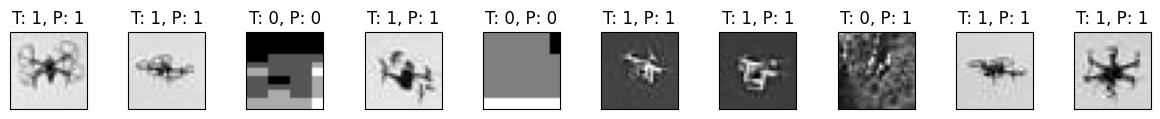

In [51]:
import matplotlib.pyplot as plt

# Function to display images and labels
def display_images_with_labels(model, X_test, y_test, class_names=["0", "1"]):
    # Select random indices
    num_images = 10
    indices = np.random.choice(X_test.shape[0], num_images, replace=False)

    # Set up a subplot with one row and 'num_images' columns
    fig, axes = plt.subplots(1, num_images, figsize=(15, 1), subplot_kw={'xticks': [], 'yticks': []})

    for i, index in enumerate(indices):
        # Get the image and true label
        img = X_test[index]
        true_label = y_test[index]

        # Reshape the image to (1, 64, 64, 1) to match the model input shape
        img = np.expand_dims(img, axis=0)

        # Predict the label using the trained model
        predicted_label = model.predict(img)[0, 0]
        predicted_class = int(round(predicted_label))

        # Display the image
        axes[i].imshow(img[0, :, :, 0], cmap='gray')
        axes[i].set_title(f'T: {class_names[true_label]}, P: {class_names[predicted_class]}')

    plt.show()

# Display random images with labels in a single row
display_images_with_labels(model, X_test, y_test)

